In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


https://www.kaggle.com/code/thiagopanini/customer-segmentation-eda-and-kmeans

# 0. Read in the preprocessed data

In [2]:
# Read in the data
dt_feats = ['AWAITING_SIGNATURE_from', 'CERTIFIED_from', 'DECLARATION_SIGNED_from','EXPIRED_from', 'EXPIRING_from', 'IN_SURVEY_from', 'NOT_STARTED_from','RENEWED_from', 'REQUIRES_ATTENTION_from', 'SURVEY_COMPLETED_from']
datapath="merged_df_for_EDA.csv"
df=pd.read_csv(datapath, parse_dates=dt_feats,usecols =[i for i in range(96)])


In [3]:
df

organisation_id  partner_id  distributor_id               size  \
0                 7780         585             246  100-249 EMPLOYEES   
1                 1189         372               1      5-9 EMPLOYEES   
2                27462        2265               1    35-49 EMPLOYEES   
3                27462        2265               1    35-49 EMPLOYEES   
4                 7829         585             246    50-99 EMPLOYEES   
...                ...         ...             ...                ...   
17834             9537         453               8      5-9 EMPLOYEES   
17835             9537         453               8      5-9 EMPLOYEES   
17836            14280         453               8      5-9 EMPLOYEES   
17837            14280         453               8      5-9 EMPLOYEES   
17838            14280         453               8      5-9 EMPLOYEES   

      industry  is_partner_org  is_test  is_trial  size_range_mean  \
0         MANU               0        0         0              175   
1         ITEC               1        0         0                7   
2         OTHE               0        0         0               42   
3         OTHE               0        0         0               42   
4         HEAL               0        0         0               75   
...        ...             ...      ...       ...              ...   
17834     AOTH               0        0         0                7   
17835     AOTH               0        0         0                7   
17836     AOTH               0        0         0                7   
17837     AOTH               0        0         0                7   
17838     AOTH               0        0         0                7   

       certificate_id  ... V2  TIER1 TIER2 TIER3 TIER4 BUNDLE SOFTWARE R&R  \
0               32818  ...  0      0     0     0     0      0        0   0   
1               40268  ...  0      0     0     0     0      0        0   0   
2               41672  ...  0      0     0     0     0      0        0   0   
3               41671  ...  0      0     0     0     0      0        0   0   
4               11447  ...  0      0     0     0     0      0        0   0   
...               ...  ... ..    ...   ...   ...   ...    ...      ...  ..   
17834           30348  ...  0      0     0     0     0      0        0   0   
17835           12979  ...  0      0     0     0     0      0        0   0   
17836           19879  ...  0      0     0     0     0      0        0   0   
17837           19878  ...  0      0     0     0     0      0        0   0   
17838           33473  ...  0      0     0     0     0      0        0   0   

      TOOLBOX period_months  
0           0            12  
1           0            12  
2           0            12  
3           0            12  
4           0            12  
...       ...           ...  
17834       0            12  
17835       0            12  
17836       0            12  
17837       0            12  
17838       0            12  

[17839 rows x 96 columns]

# 1. EDA

## 1.1 Analyse the distinct values of every feature

In [4]:
# count the distinct values of each column
count = df.nunique()
print(count.to_string())

organisation_id                  5031
partner_id                        818
distributor_id                     18
size                               10
industry                           53
is_partner_org                      2
is_test                             2
is_trial                            2
size_range_mean                    10
certificate_id                  11150
certificate_type                    4
certificate_year                    7
AWAITING_SIGNATURE_from           216
CERTIFIED_from                   3544
DECLARATION_SIGNED_from           176
EXPIRED_from                     3323
EXPIRING_from                     557
IN_SURVEY_from                   2321
NOT_STARTED_from                  863
RENEWED_from                      246
REQUIRES_ATTENTION_from           479
SURVEY_COMPLETED_from              30
AWAITING_SIGNATURE_dow              6
AWAITING_SIGNATURE_month            8
AWAITING_SIGNATURE_year             3
CERTIFIED_dow                       7
CERTIFIED_mo

In [5]:
columns_1value_only=df[['testing','AU','COMPLETE','BRIGANTIA','FIF','V2','TIER1','TIER2','TIER3','TIER4','BUNDLE','SOFTWARE','R&R','TOOLBOX',]]
for column in columns_1value_only:
    print(f"The only value of column \"{column}\" is {columns_1value_only[column].unique()}")

The only value of column "testing" is [0]
The only value of column "AU" is [0]
The only value of column "COMPLETE" is [0]
The only value of column "BRIGANTIA" is [0]
The only value of column "FIF" is [0]
The only value of column "V2" is [0]
The only value of column "TIER1" is [0]
The only value of column "TIER2" is [0]
The only value of column "TIER3" is [0]
The only value of column "TIER4" is [0]
The only value of column "BUNDLE" is [0]
The only value of column "SOFTWARE" is [0]
The only value of column "R&R" is [0]
The only value of column "TOOLBOX" is [0]


Columns ['testing','AU','COMPLETE','BRIGANTIA','FIF','V2','TIER1','TIER2','TIER3','TIER4','BUNDLE','SOFTWARE','R&R','TOOLBOX'] have only 1 value: 0. 

In [6]:
# Drop the columns that have only one distinct value.
df=df.drop(['testing','AU','COMPLETE','BRIGANTIA','FIF','V2','TIER1','TIER2','TIER3','TIER4','BUNDLE','SOFTWARE','R&R','TOOLBOX'],axis=1)

In [7]:
df

organisation_id  partner_id  distributor_id               size  \
0                 7780         585             246  100-249 EMPLOYEES   
1                 1189         372               1      5-9 EMPLOYEES   
2                27462        2265               1    35-49 EMPLOYEES   
3                27462        2265               1    35-49 EMPLOYEES   
4                 7829         585             246    50-99 EMPLOYEES   
...                ...         ...             ...                ...   
17834             9537         453               8      5-9 EMPLOYEES   
17835             9537         453               8      5-9 EMPLOYEES   
17836            14280         453               8      5-9 EMPLOYEES   
17837            14280         453               8      5-9 EMPLOYEES   
17838            14280         453               8      5-9 EMPLOYEES   

      industry  is_partner_org  is_test  is_trial  size_range_mean  \
0         MANU               0        0         0              175   
1         ITEC               1        0         0                7   
2         OTHE               0        0         0               42   
3         OTHE               0        0         0               42   
4         HEAL               0        0         0               75   
...        ...             ...      ...       ...              ...   
17834     AOTH               0        0         0                7   
17835     AOTH               0        0         0                7   
17836     AOTH               0        0         0                7   
17837     AOTH               0        0         0                7   
17838     AOTH               0        0         0                7   

       certificate_id  ... V5  DISTRIBUTOR LEGACY FIF2 IASME PLAN LTT LTT2  \
0               32818  ...  0            1      0    0     0    0   0    0   
1               40268  ...  0            1      0    0     0    0   0    0   
2               41672  ...  0            0      0    0     0    0   0    0   
3               41671  ...  0            0      0    0     0    0   0    0   
4               11447  ...  0            0      0    0     0    0   0    0   
...               ...  ... ..          ...    ...  ...   ...  ...  ..  ...   
17834           30348  ...  0            0      0    0     0    0   0    0   
17835           12979  ...  0            0      0    0     0    0   0    0   
17836           19879  ...  0            0      0    0     0    0   0    0   
17837           19878  ...  0            0      0    0     0    0   0    0   
17838           33473  ...  0            0      0    0     0    0   0    0   

      COPY2 period_months  
0         0            12  
1         0            12  
2         0            12  
3         0            12  
4         1            12  
...     ...           ...  
17834     0            12  
17835     0            12  
17836     0            12  
17837     0            12  
17838     0            12  

[17839 rows x 82 columns]

## 1.2 Comprehensive analysis of all the features

In [8]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df.describe())

       organisation_id  partner_id  distributor_id  is_partner_org    is_test  \
count        17839.000   17839.000       17839.000       17839.000  17839.000   
mean         10650.113    1415.938          14.356           0.191      0.017   
std           8786.954    1936.079          40.437           0.393      0.129   
min             12.000       1.000           1.000           0.000      0.000   
25%           2434.000     436.000           1.000           0.000      0.000   
50%           8649.000     453.000           2.000           0.000      0.000   
75%          16456.000    2087.000           8.000           0.000      0.000   
max          28395.000    8361.000         310.000           1.000      1.000   

        is_trial  size_range_mean  certificate_id  certificate_year  \
count  17839.000        17839.000       17839.000         17839.000   
mean       0.001           60.004       26312.645          2021.153   
std        0.033          158.265       13805.149        

## 1.3 Relationships between the companies and subscriptions

In [9]:
# Create a dataframe that only stores the the relationship between organizations and plans 
df_plans=df.drop([  'certificate_id', 'certificate_type', 'certificate_year',
       'AWAITING_SIGNATURE_from', 'CERTIFIED_from', 'DECLARATION_SIGNED_from',
       'EXPIRED_from', 'EXPIRING_from', 'IN_SURVEY_from', 'NOT_STARTED_from',
       'RENEWED_from', 'REQUIRES_ATTENTION_from', 'SURVEY_COMPLETED_from',
       'AWAITING_SIGNATURE_dow', 'AWAITING_SIGNATURE_month',
       'AWAITING_SIGNATURE_year', 'CERTIFIED_dow', 'CERTIFIED_month',
       'CERTIFIED_year', 'DECLARATION_SIGNED_dow', 'DECLARATION_SIGNED_month',
       'DECLARATION_SIGNED_year', 'EXPIRED_dow', 'EXPIRED_month',
       'EXPIRED_year', 'EXPIRING_dow', 'EXPIRING_month', 'EXPIRING_year',
       'IN_SURVEY_dow', 'IN_SURVEY_month', 'IN_SURVEY_year', 'NOT_STARTED_dow',
       'NOT_STARTED_month', 'NOT_STARTED_year', 'RENEWED_dow', 'RENEWED_month',
       'RENEWED_year', 'REQUIRES_ATTENTION_dow', 'REQUIRES_ATTENTION_month',
       'REQUIRES_ATTENTION_year', 'SURVEY_COMPLETED_dow',
       'SURVEY_COMPLETED_month', 'SURVEY_COMPLETED_year','subscription_organisation_id'],axis=1)

# Drop the duplicate columns
df_plans=df_plans.drop_duplicates()

Since the Version&Copies are not significant, we focus maily on columns:
- Sales_channel:[DIRECT/PATNER/DISTRIBUTOR]
- PRODUCTS: [CAP/CE/CEP/GDPR/CERT-OS/VSS]
- period_months:[1/12/36]

### (1) The distribution of industry types

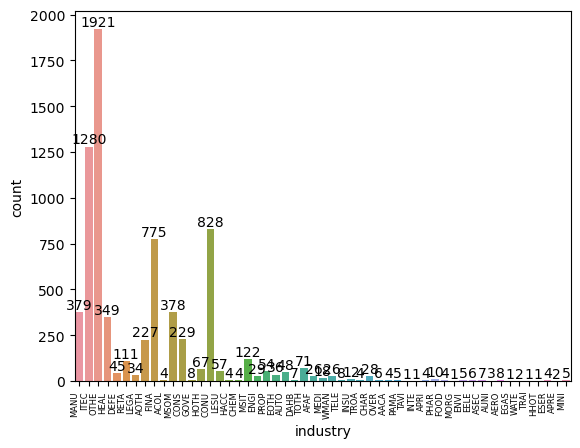

In [10]:
# industries' types distribution
ax = sns.countplot(x='industry', data=df_plans)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=6)
ax.bar_label(ax.containers[0])

plt.rcParams["figure.figsize"] = (16, 5)
plt.show()

- Information Technology Industries have the greatest demand for cyber security, followed by Consultancy, Financial...

In [11]:
df_plans

organisation_id  partner_id  distributor_id               size  \
0                 7780         585             246  100-249 EMPLOYEES   
1                 1189         372               1      5-9 EMPLOYEES   
2                27462        2265               1    35-49 EMPLOYEES   
4                 7829         585             246    50-99 EMPLOYEES   
5                 7829         585             246    50-99 EMPLOYEES   
...                ...         ...             ...                ...   
17818             5319         453               8    35-49 EMPLOYEES   
17822             7845         453               8      5-9 EMPLOYEES   
17823             7845         453               8      5-9 EMPLOYEES   
17834             9537         453               8      5-9 EMPLOYEES   
17836            14280         453               8      5-9 EMPLOYEES   

      industry  is_partner_org  is_test  is_trial  size_range_mean  \
0         MANU               0        0         0              175   
1         ITEC               1        0         0                7   
2         OTHE               0        0         0               42   
4         HEAL               0        0         0               75   
5         HEAL               0        0         0               75   
...        ...             ...      ...       ...              ...   
17818     OTHE               0        0         0               42   
17822     AOTH               0        0         0                7   
17823     AOTH               0        0         0                7   
17834     AOTH               0        0         0                7   
17836     AOTH               0        0         0                7   

                         plan_name  ... V5  DISTRIBUTOR  LEGACY  FIF2  IASME  \
0          DISTRIBUTOR||CE||ANNUAL  ...  0            1       0     0      0   
1          DISTRIBUTOR||CE||ANNUAL  ...  0            1       0     0      0   
2      PARTNER||CE/CEP/CAP||ANNUAL  ...  0            0       0     0      0   
4        PARTNER||CE||ANNUAL-COPY2  ...  0            0       0     0      0   
5             PARTNER||CEP||ANNUAL  ...  0            0       0     0      0   
...                            ...  ... ..          ...     ...   ...    ...   
17818       DIRECT||CE/CEP||ANNUAL  ...  0            0       0     0      0   
17822      DIRECT||CEP/CAP||ANNUAL  ...  0            0       0     0      0   
17823       DIRECT||CE/CAP||ANNUAL  ...  0            0       0     0      0   
17834           DIRECT||CE||ANNUAL  ...  0            0       0     0      0   
17836           DIRECT||CE||ANNUAL  ...  0            0       0     0      0   

       PLAN  LTT  LTT2  COPY2  period_months  
0         0    0     0      0             12  
1         0    0     0      0             12  
2         0    0     0      0             12  
4         0    0     0      1             12  
5         0    0     0      0             12  
...     ...  ...   ...    ...            ...  
17818     0    0     0      0             12  
17822     0    0     0      0             12  
17823     0    0     0      0             12  
17834     0    0     0      0             12  
17836     0    0     0      0             12  

[7270 rows x 38 columns]

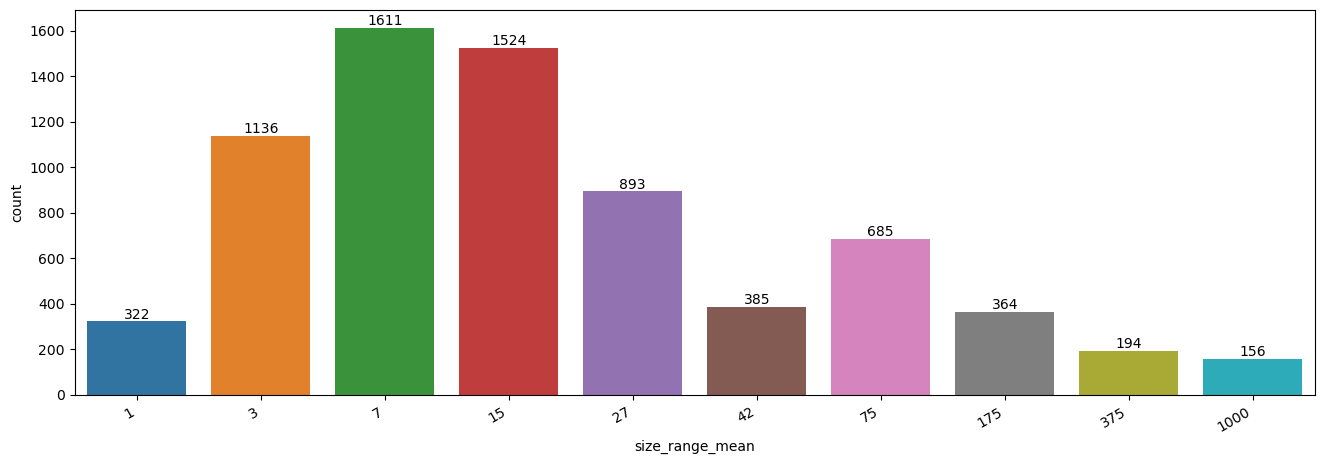

<Figure size 500x400 with 0 Axes>

In [12]:
ax=sns.countplot(data=df_plans,x='size_range_mean')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right", fontsize=10)
ax.bar_label(ax.containers[0])

plt.figure(figsize=(5,4))
plt.show()

- Most of the customers of CyberSmart are Small and medium-sized enterprises, especially of size:5-9

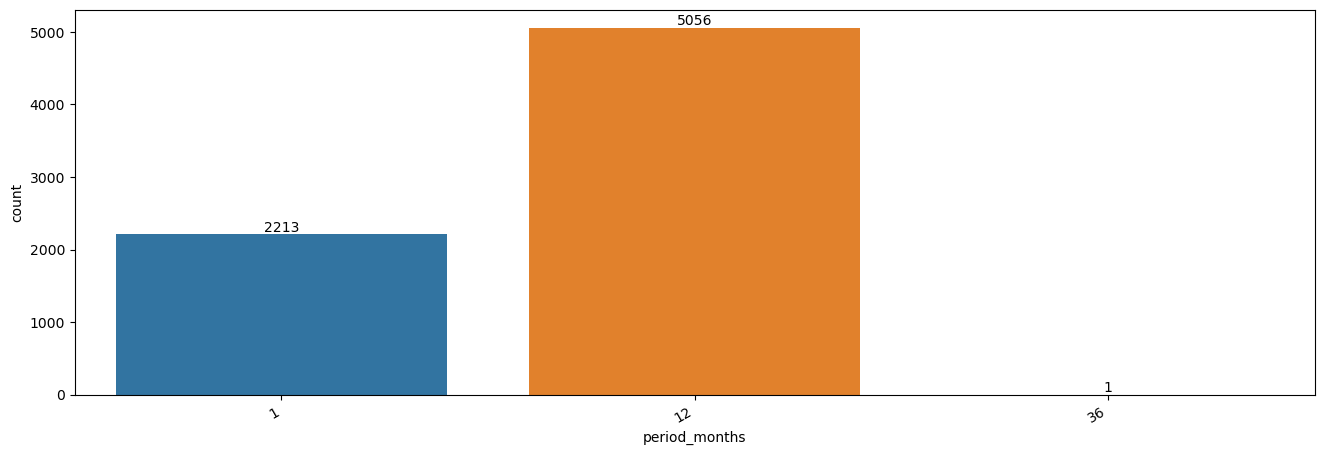

<Figure size 500x400 with 0 Axes>

In [13]:
ax=sns.countplot(data=df_plans,x='period_months')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right", fontsize=10)
ax.bar_label(ax.containers[0])

plt.figure(figsize=(5,4))
plt.show()

- Only one company subscibes a 3-year plan. 53.18%(5056 out of 9506) subscribtions are 1-year.30.44% subscribtions are 1 moth lasting.

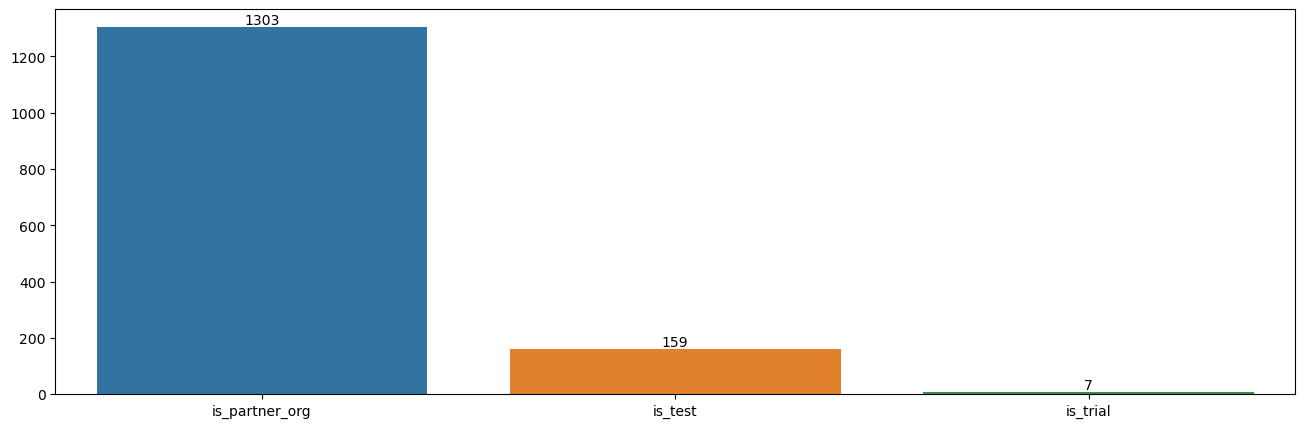

<Figure size 500x400 with 0 Axes>

In [14]:
df_relationships=df_plans.apply(pd.Series.value_counts)
df_relationships=df_relationships.iloc[[1]]
df_relationships=df_relationships[['is_partner_org', 'is_test', 'is_trial']]

ax2 = sns.barplot(data=df_relationships)
ax2.bar_label(ax2.containers[0])
plt.figure(figsize=(5,4))

# plt.rcParams["figure.figsize"] = (5, 4)
plt.show()

- 1303(17.9%) out of 7270 organizations are patners with CyberSmart, 2.19% are test, while only 0.09% are trials.

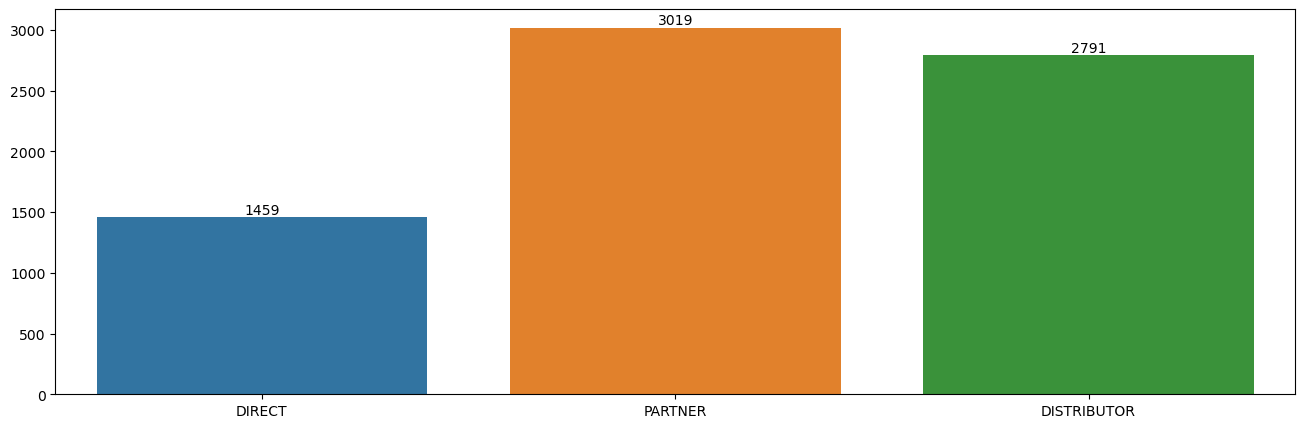

<Figure size 500x400 with 0 Axes>

In [15]:
df_channels=df_plans.apply(pd.Series.value_counts)
df_channels=df_channels.iloc[[1]]
df_channels=df_channels[['DIRECT', 'PARTNER', 'DISTRIBUTOR']]

ax2 = sns.barplot(data=df_channels)
ax2.bar_label(ax2.containers[0])
plt.figure(figsize=(5,4))

# plt.rcParams["figure.figsize"] = (5, 4)
plt.show()

- most products are sold by partners.

### (2) The sales of products

In [16]:
# select columns which indicates the products and drop those like "version" which are not significant.
df_products=df_plans[['organisation_id', 'partner_id', 'distributor_id', 'size', 'industry',
       'is_partner_org', 'is_test', 'is_trial', 'size_range_mean', 'plan_name',
       'subscriptions_status',  'CAP', 'CE', 
       'CEP', 'GDPR',  'CERT',   'VSS']]
df_products

organisation_id  partner_id  distributor_id               size  \
0                 7780         585             246  100-249 EMPLOYEES   
1                 1189         372               1      5-9 EMPLOYEES   
2                27462        2265               1    35-49 EMPLOYEES   
4                 7829         585             246    50-99 EMPLOYEES   
5                 7829         585             246    50-99 EMPLOYEES   
...                ...         ...             ...                ...   
17818             5319         453               8    35-49 EMPLOYEES   
17822             7845         453               8      5-9 EMPLOYEES   
17823             7845         453               8      5-9 EMPLOYEES   
17834             9537         453               8      5-9 EMPLOYEES   
17836            14280         453               8      5-9 EMPLOYEES   

      industry  is_partner_org  is_test  is_trial  size_range_mean  \
0         MANU               0        0         0              175   
1         ITEC               1        0         0                7   
2         OTHE               0        0         0               42   
4         HEAL               0        0         0               75   
5         HEAL               0        0         0               75   
...        ...             ...      ...       ...              ...   
17818     OTHE               0        0         0               42   
17822     AOTH               0        0         0                7   
17823     AOTH               0        0         0                7   
17834     AOTH               0        0         0                7   
17836     AOTH               0        0         0                7   

                         plan_name subscriptions_status  CAP  CE  CEP  GDPR  \
0          DISTRIBUTOR||CE||ANNUAL               Active    0   1    0     0   
1          DISTRIBUTOR||CE||ANNUAL               Active    0   1    0     0   
2      PARTNER||CE/CEP/CAP||ANNUAL               Active    1   1    1     0   
4        PARTNER||CE||ANNUAL-COPY2               Active    0   1    0     0   
5             PARTNER||CEP||ANNUAL               Active    0   0    1     0   
...                            ...                  ...  ...  ..  ...   ...   
17818       DIRECT||CE/CEP||ANNUAL               Active    0   1    1     0   
17822      DIRECT||CEP/CAP||ANNUAL               Active    1   0    1     0   
17823       DIRECT||CE/CAP||ANNUAL               Active    1   1    0     0   
17834           DIRECT||CE||ANNUAL               Active    0   1    0     0   
17836           DIRECT||CE||ANNUAL               Active    0   1    0     0   

       CERT  VSS  
0         0    0  
1         0    0  
2         0    0  
4         0    0  
5         0    0  
...     ...  ...  
17818     0    0  
17822     0    0  
17823     0    0  
17834     0    0  
17836     0    0  

[7270 rows x 17 columns]

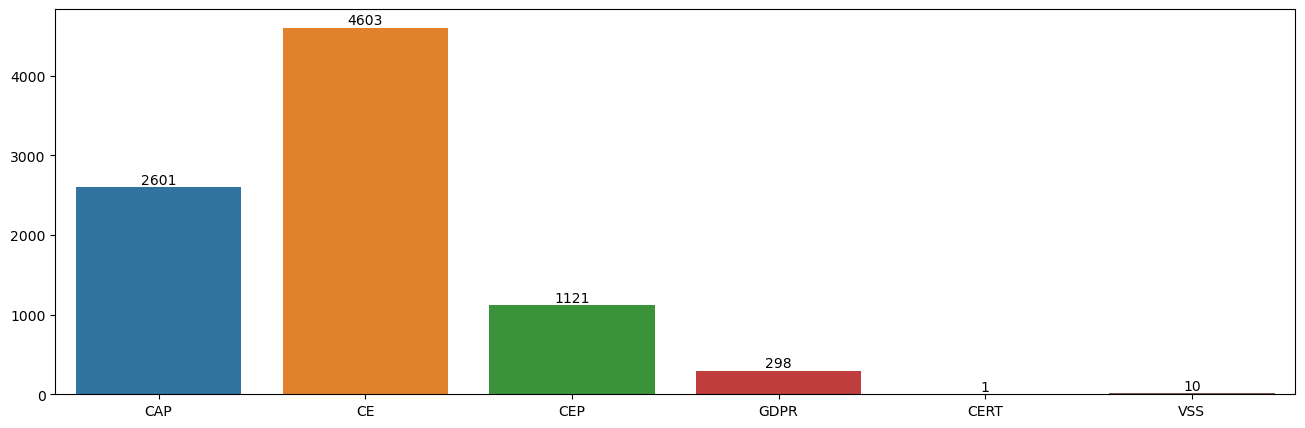

<Figure size 500x400 with 0 Axes>

In [17]:
df_products_sales=df_products.apply(pd.Series.value_counts)
products_sales=df_products_sales.iloc[[1]]

products_sales=products_sales[['CAP', 'CE', 'CEP', 'GDPR', 'CERT', 'VSS']]

ax2 = sns.barplot(data=products_sales)
ax2.bar_label(ax2.containers[0])
plt.figure(figsize=(5,4))

# plt.rcParams["figure.figsize"] = (5, 4)
plt.show()

The most popular services that CyberSmart offers are 'CE','CAP','CEP', while 'CERT','VSS' are least needed

In [18]:
df_products.loc[df_products['CERT'] == 1]

organisation_id  partner_id  distributor_id             size industry  \
1313             3429         799               2  10-19 EMPLOYEES     ITEC   

      is_partner_org  is_test  is_trial  size_range_mean  \
1313               1        0         0               15   

                     plan_name subscriptions_status  CAP  CE  CEP  GDPR  CERT  \
1313  PARTNER||CERT-OS||ANNUAL               Active    0   0    0     0     1   

      VSS  
1313    0

In [19]:
df_products.loc[df_products['VSS'] == 1]

organisation_id  partner_id  distributor_id               size  \
3321             26331        8139              79    20-34 EMPLOYEES   
4662             26924        7498               2    50-99 EMPLOYEES   
5306             22461        1690               2    50-99 EMPLOYEES   
6335             12996        1690               2    10-19 EMPLOYEES   
6569             19624        2119               2    35-49 EMPLOYEES   
11254            15335        3081              79    10-19 EMPLOYEES   
11693              996         547               2      5-9 EMPLOYEES   
14158            28200          55               2    35-49 EMPLOYEES   
15570            27510        4926             178  250-499 EMPLOYEES   
16173            27512        7631               2    50-99 EMPLOYEES   

      industry  is_partner_org  is_test  is_trial  size_range_mean  \
3321      ITEC               0        0         0               27   
4662      CONU               0        0         0               75   
5306      OTHE               0        0         0               75   
6335      OTHE               0        0         0               15   
6569      MANU               0        0         0               42   
11254     MSOM               1        0         0               15   
11693     MANU               0        0         0                7   
14158     OTHE               0        0         0               42   
15570     OTHE               0        0         0              375   
16173     FINA               0        0         0               75   

                   plan_name subscriptions_status  CAP  CE  CEP  GDPR  CERT  \
3321   PARTNER||VSS||MONTHLY               Active    0   0    0     0     0   
4662   PARTNER||VSS||MONTHLY               Active    0   0    0     0     0   
5306    PARTNER||VSS||ANNUAL               Active    0   0    0     0     0   
6335    PARTNER||VSS||ANNUAL               Active    0   0    0     0     0   
6569   PARTNER||VSS||MONTHLY               Active    0   0    0     0     0   
11254  PARTNER||VSS||MONTHLY               Active    0   0    0     0     0   
11693   PARTNER||VSS||ANNUAL               Active    0   0    0     0     0   
14158  PARTNER||VSS||MONTHLY               Active    0   0    0     0     0   
15570  PARTNER||VSS||MONTHLY               Active    0   0    0     0     0   
16173  PARTNER||VSS||MONTHLY               Active    0   0    0     0     0   

       VSS  
3321     1  
4662     1  
5306     1  
6335     1  
6569     1  
11254    1  
11693    1  
14158    1  
15570    1  
16173    1

There is only one record for product "CERT" and 10 records for "VSS". The sample is too small. So let's focus on the other 4 producst


### (3) Different sales for different industries types

In [20]:
# ax3=sns.barplot(data=df_products,x='industry',y='CAP',estimator=sum,ci=None)
# ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90, ha="right", fontsize=10)
# ax3.bar_label(ax3.containers[0])

# plt.rcParams["figure.figsize"] = (16, 5)
# plt.show()

In [21]:
ce_by_idt = df_products.groupby(by="industry")["CE"].sum()
cap_by_idt = df_products.groupby(by="industry")["CAP"].sum()
cep_by_industry = df_products.groupby(by="industry")["CEP"].sum()
gdpr_by_industry = df_products.groupby(by="industry")["GDPR"].sum()

In [22]:
df_products_by_industry = pd.DataFrame()

In [23]:
df_products_by_industry['CE_sales']=ce_by_idt
df_products_by_industry['CAP_sales']=cap_by_idt
df_products_by_industry['CEP_sales']=cep_by_industry
df_products_by_industry['GDPR_sales']=gdpr_by_industry

In [24]:
df_products_by_industry.reset_index()

industry  CE_sales  CAP_sales  CEP_sales  GDPR_sales
0      AACA         3          1          0           0
1      ACOL         4          1          0           0
2      AERO         5          4          2           0
3      AFAF        17          8          0           1
4      AOTH       152         67         31           3
5      APRE         2          0          0           0
6      APRI         2          2          0           0
7      ASEC         2          5          0           0
8      AUNI         2          0          1           1
9      AUTO        35         13          2           0
10     CHAR        23         11          3           1
11     CHEM         4          1          2           0
12     CONS       155         73         25           7
13     CONU       460        320         85          30
14     DAHB         2          4          0           1
15     DEFE        28         12          8           1
16     EELE         3          3          0           0
17     EGAS         0          1          0           0
18     ENGI        21          6          5           0
19     ENVI         5          0          0           0
20     EOTH        23         14          2           1
21     ESER         2          0          2           0
22     FINA       517        288        260          25
23     FOOD         3          1          0           0
24     GOVE         7          3          1           1
25     HACC         3          1          1           0
26     HEAL       229        124         47          16
27     HHOT         0          1          0           0
28     HOTH        45         32          6           1
29     INSU        10          5          1           0
30     INTE         1          1          0           0
31     ITEC       644        516        194          55
32     LEGA        28         14          4           0
33     LESU        33         26          3           2
34     MANU       243        114         41          13
35     MEDI        15          6          2           0
36     MINI         4          1          0           0
37     MORG         1          1          0           0
38     MSIT        66         55         14           7
39     MSOM       256         94         52           4
40     OTHE      1373        658        298         112
41     OVER         3          2          1           0
42     PAMA         1          3          1           0
43     PHAR         7          5          1           0
44     PROP        32         19          8           3
45     RETA        67         38          9           8
46     TAVI         1          0          0           0
47     TELE         5          3          0           0
48     TOTH        38         31          6           5
49     TRAI         1          0          0           0
50     TROA         4          1          1           0
51     WATE         2          0          0           0
52     WMAN        14         12          2           0

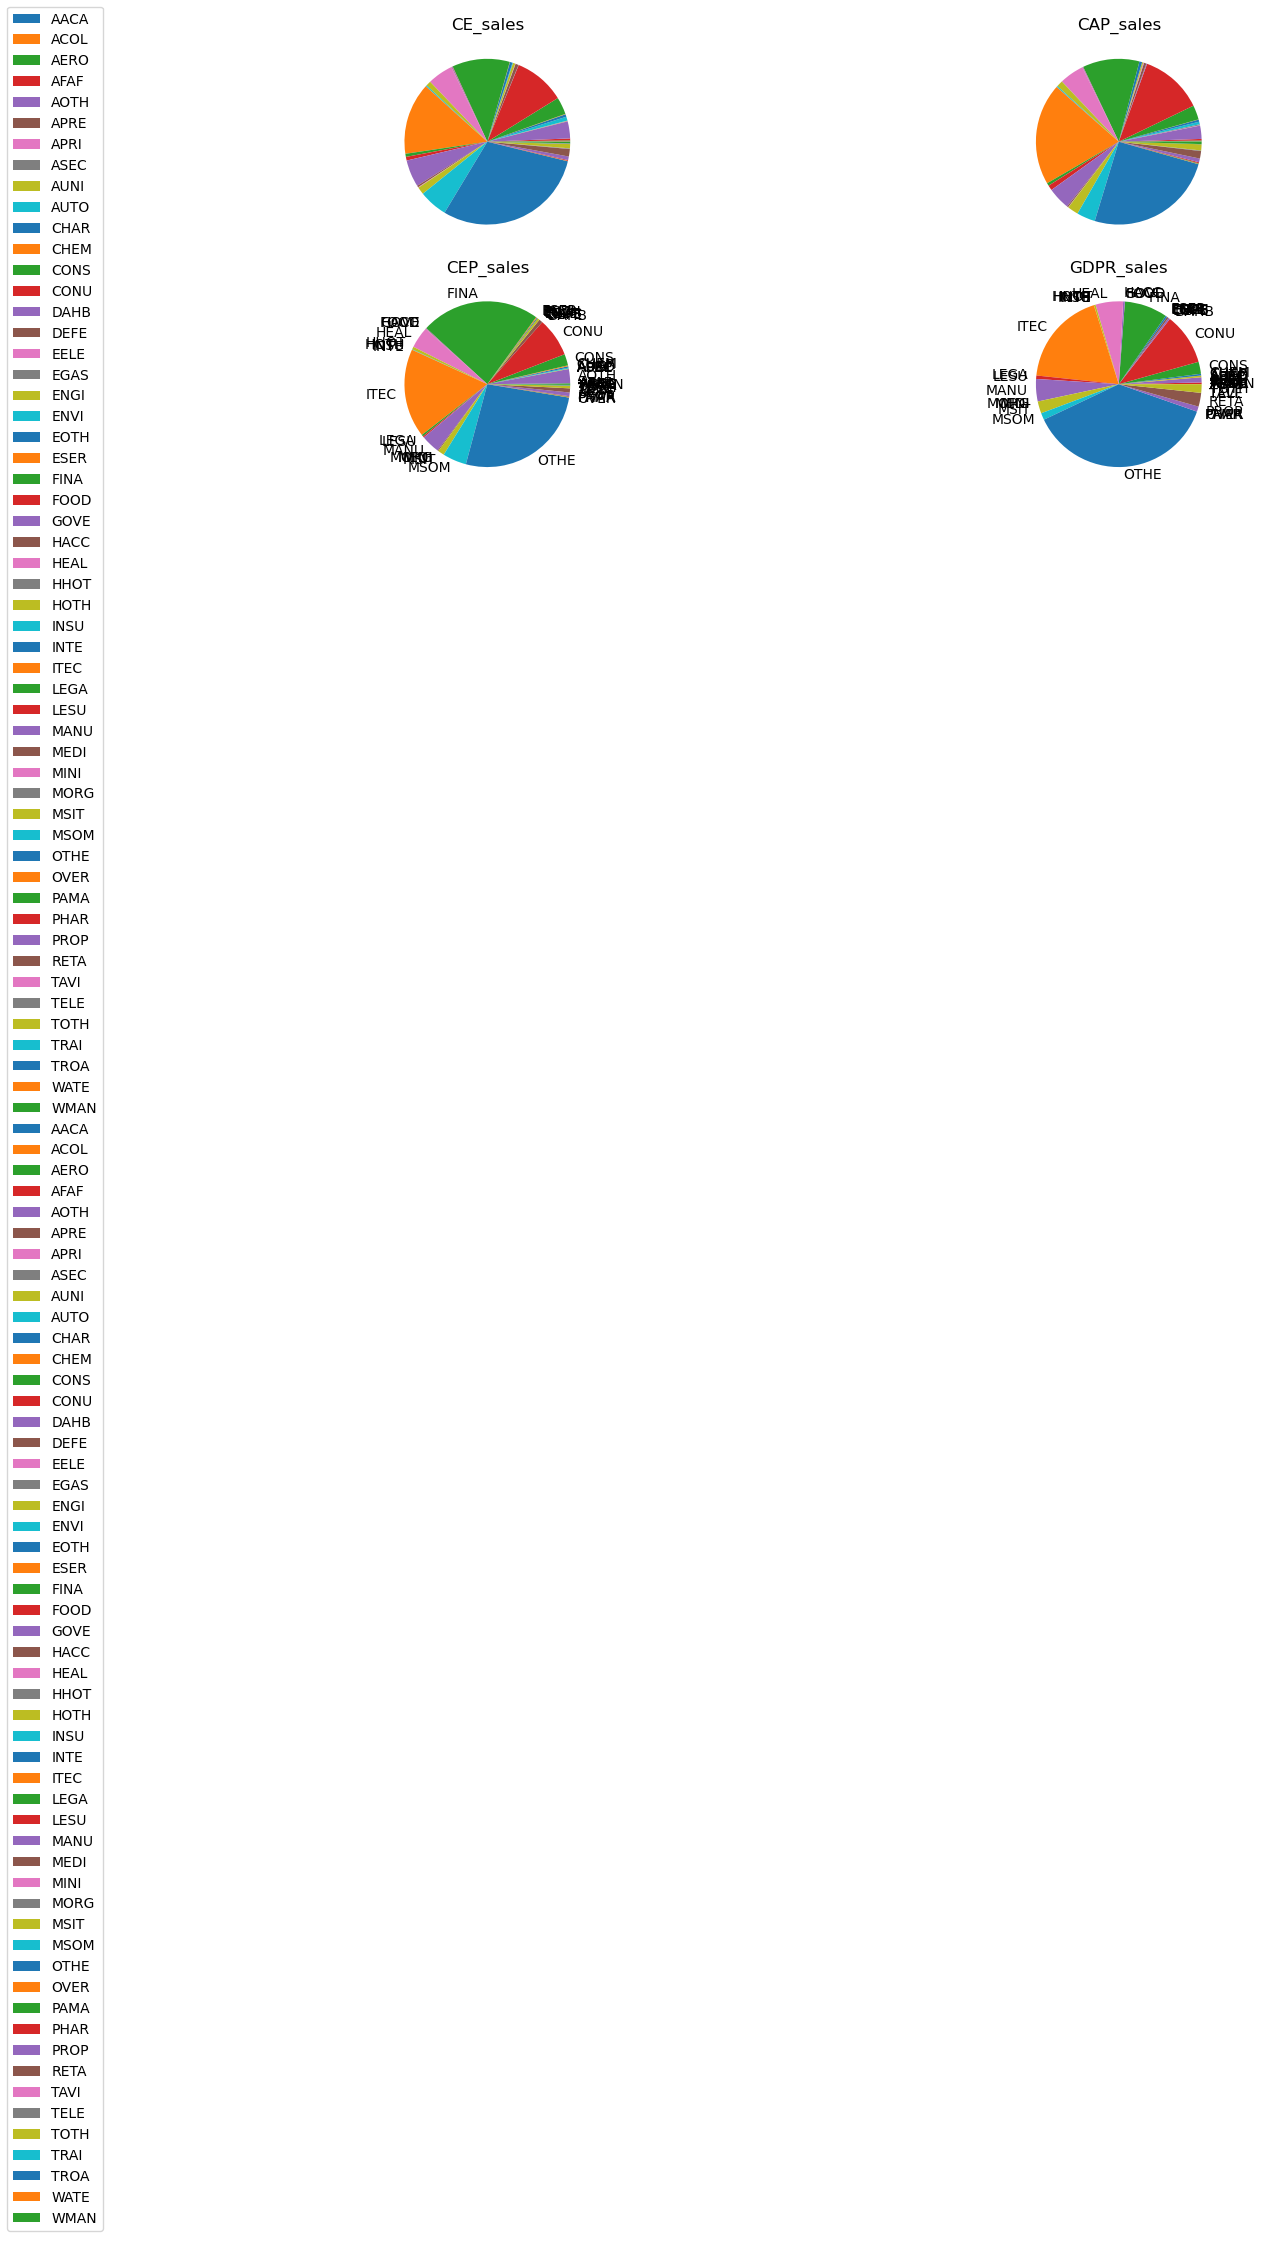

In [25]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].pie(df_products_by_industry['CE_sales'])
axs[0, 0].set_title('CE_sales')
axs[0, 1].pie(df_products_by_industry['CAP_sales'])
axs[0, 1].set_title('CAP_sales')
axs[1, 0].pie(df_products_by_industry['CEP_sales'],labels=df_products_by_industry.index)
axs[1, 0].set_title('CEP_sales')
axs[1, 1].pie(df_products_by_industry['GDPR_sales'],labels=df_products_by_industry.index)
axs[1, 1].set_title('GDPR_sales')


fig.tight_layout() 
fig.legend(loc="upper left")



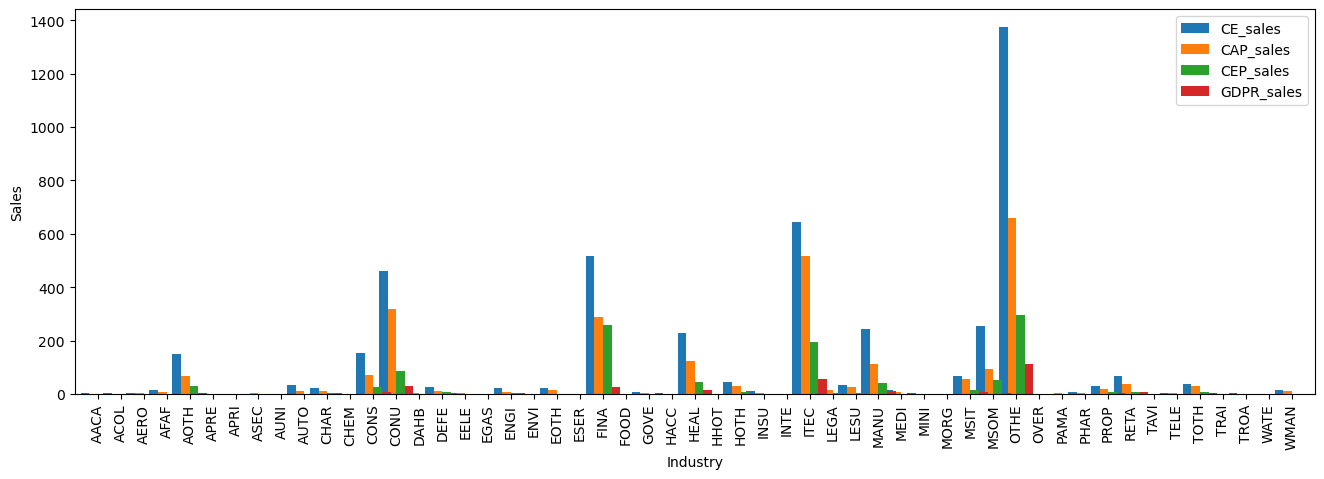

In [26]:
ax4 = df_products_by_industry.plot.bar(stacked=False,width=1.5)
ax4.set_ylabel("Sales")
ax4.set_xlabel("Industry")

# ax4.set_xticklabels(ax4.get_xticklabels(),  fontsize=10)
# ax4.bar_label(ax4.containers[0])
# ax4.bar_label(ax4.containers[1])

plt.show()

## 1.4 Relationships between the companies and certificates

In [27]:
# Create a dataframe that only stores the the relationship between organizations and plans 
df_certificates=df.drop([ 'subscription_organisation_id', 'plan_name', 'subscriptions_status',
       'DIRECT', 'CAP', 'V3', 'V6', 'CE', 'BASIC', 'CEP', 'GDPR', 'PRO',
       'PARTNER', 'CERT', 'OS', 'COPY1', 'COPY', 'VSS', 'V4', 'APP', 'V5',
       'DISTRIBUTOR', 'LEGACY', 'FIF2', 'IASME', 'PLAN', 'LTT', 'LTT2',
       'COPY2', 'period_months'],axis=1)

# Drop the duplicate columns
df_certificates=df_certificates.drop_duplicates()

In [28]:
df_certificates

organisation_id  partner_id  distributor_id               size  \
0                 7780         585             246  100-249 EMPLOYEES   
1                 1189         372               1      5-9 EMPLOYEES   
2                27462        2265               1    35-49 EMPLOYEES   
3                27462        2265               1    35-49 EMPLOYEES   
4                 7829         585             246    50-99 EMPLOYEES   
...                ...         ...             ...                ...   
17834             9537         453               8      5-9 EMPLOYEES   
17835             9537         453               8      5-9 EMPLOYEES   
17836            14280         453               8      5-9 EMPLOYEES   
17837            14280         453               8      5-9 EMPLOYEES   
17838            14280         453               8      5-9 EMPLOYEES   

      industry  is_partner_org  is_test  is_trial  size_range_mean  \
0         MANU               0        0         0              175   
1         ITEC               1        0         0                7   
2         OTHE               0        0         0               42   
3         OTHE               0        0         0               42   
4         HEAL               0        0         0               75   
...        ...             ...      ...       ...              ...   
17834     AOTH               0        0         0                7   
17835     AOTH               0        0         0                7   
17836     AOTH               0        0         0                7   
17837     AOTH               0        0         0                7   
17838     AOTH               0        0         0                7   

       certificate_id  ... NOT_STARTED_year  RENEWED_dow RENEWED_month  \
0               32818  ...              NaN          NaN           NaN   
1               40268  ...           2022.0          NaN           NaN   
2               41672  ...              NaN          NaN           NaN   
3               41671  ...              NaN          NaN           NaN   
4               11447  ...              NaN          NaN           NaN   
...               ...  ...              ...          ...           ...   
17834           30348  ...              NaN          NaN           NaN   
17835           12979  ...              NaN          NaN           NaN   
17836           19879  ...              NaN          NaN           NaN   
17837           19878  ...              NaN          NaN           NaN   
17838           33473  ...              NaN          NaN           NaN   

      RENEWED_year REQUIRES_ATTENTION_dow REQUIRES_ATTENTION_month  \
0              NaN                    NaN                      NaN   
1              NaN                    NaN                      NaN   
2              NaN                    NaN                      NaN   
3              NaN                    NaN                      NaN   
4              NaN                    NaN                      NaN   
...            ...                    ...                      ...   
17834          NaN                    NaN                      NaN   
17835          NaN                    NaN                      NaN   
17836          NaN                    NaN                      NaN   
17837          NaN                    NaN                      NaN   
17838          NaN                    NaN                      NaN   

      REQUIRES_ATTENTION_year SURVEY_COMPLETED_dow SURVEY_COMPLETED_month  \
0                         NaN                  NaN                    NaN   
1                         NaN                  NaN                    NaN   
2                         NaN                  NaN                    NaN   
3                         NaN                  NaN                    NaN   
4                         NaN                  NaN                    NaN   
...                       ...                  ...                    ...   
17834               

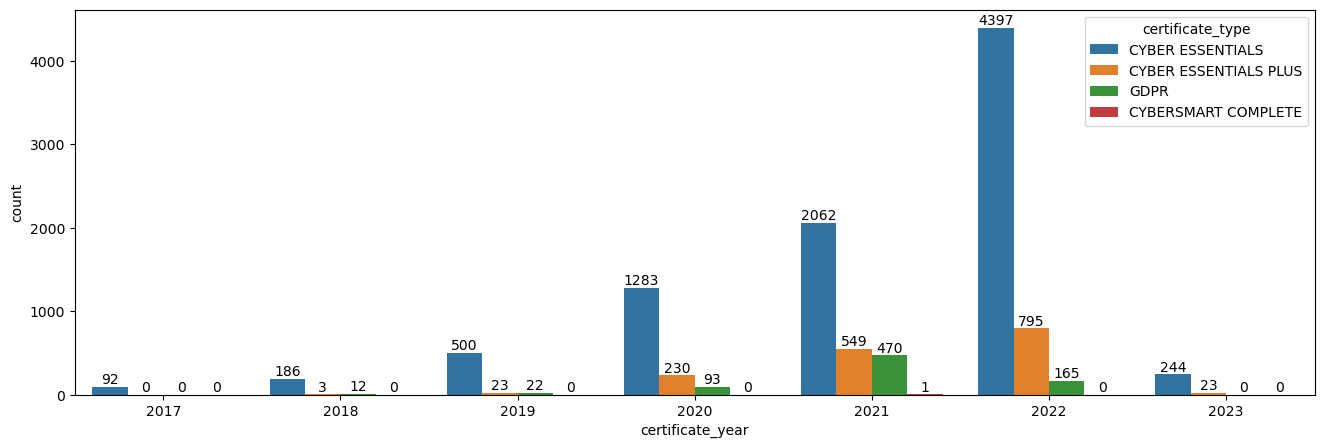

<Figure size 1600x500 with 0 Axes>

In [29]:
ax=sns.countplot(data=df_certificates,x='certificate_year',hue='certificate_type')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right", fontsize=10)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])


plt.figure(figsize=(16,5))
plt.show()

- only one record for CYBERSMART COMPELETE certificate

# . Addition 

## The correlation of all variables

In [30]:
df.dtypes

organisation_id     int64
partner_id          int64
distributor_id      int64
size               object
industry           object
                    ...  
PLAN                int64
LTT                 int64
LTT2                int64
COPY2               int64
period_months       int64
Length: 82, dtype: object

In [31]:
import pandas as pd
from dython.nominal import associations

In [32]:
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df)
categorical_features

['size',
 'industry',
 'certificate_type',
 'AWAITING_SIGNATURE_from',
 'CERTIFIED_from',
 'DECLARATION_SIGNED_from',
 'EXPIRED_from',
 'EXPIRING_from',
 'IN_SURVEY_from',
 'NOT_STARTED_from',
 'RENEWED_from',
 'REQUIRES_ATTENTION_from',
 'SURVEY_COMPLETED_from',
 'plan_name',
 'subscriptions_status']

In [33]:
df_correlation=df

D:\anaconda3\lib\site-packages\dython\nominal.py:293: RuntimeWarning: Rounded eta = 1.0000000000000002 to 1. This is probably due to floating point precision issues.
  warnings.warn(
D:\anaconda3\lib\site-packages\dython\nominal.py:293: RuntimeWarning: Rounded eta = 1.0000000000000002 to 1. This is probably due to floating point precision issues.
  warnings.warn(
D:\anaconda3\lib\site-packages\dython\nominal.py:293: RuntimeWarning: Rounded eta = 1.0000000000000002 to 1. This is probably due to floating point precision issues.
  warnings.warn(


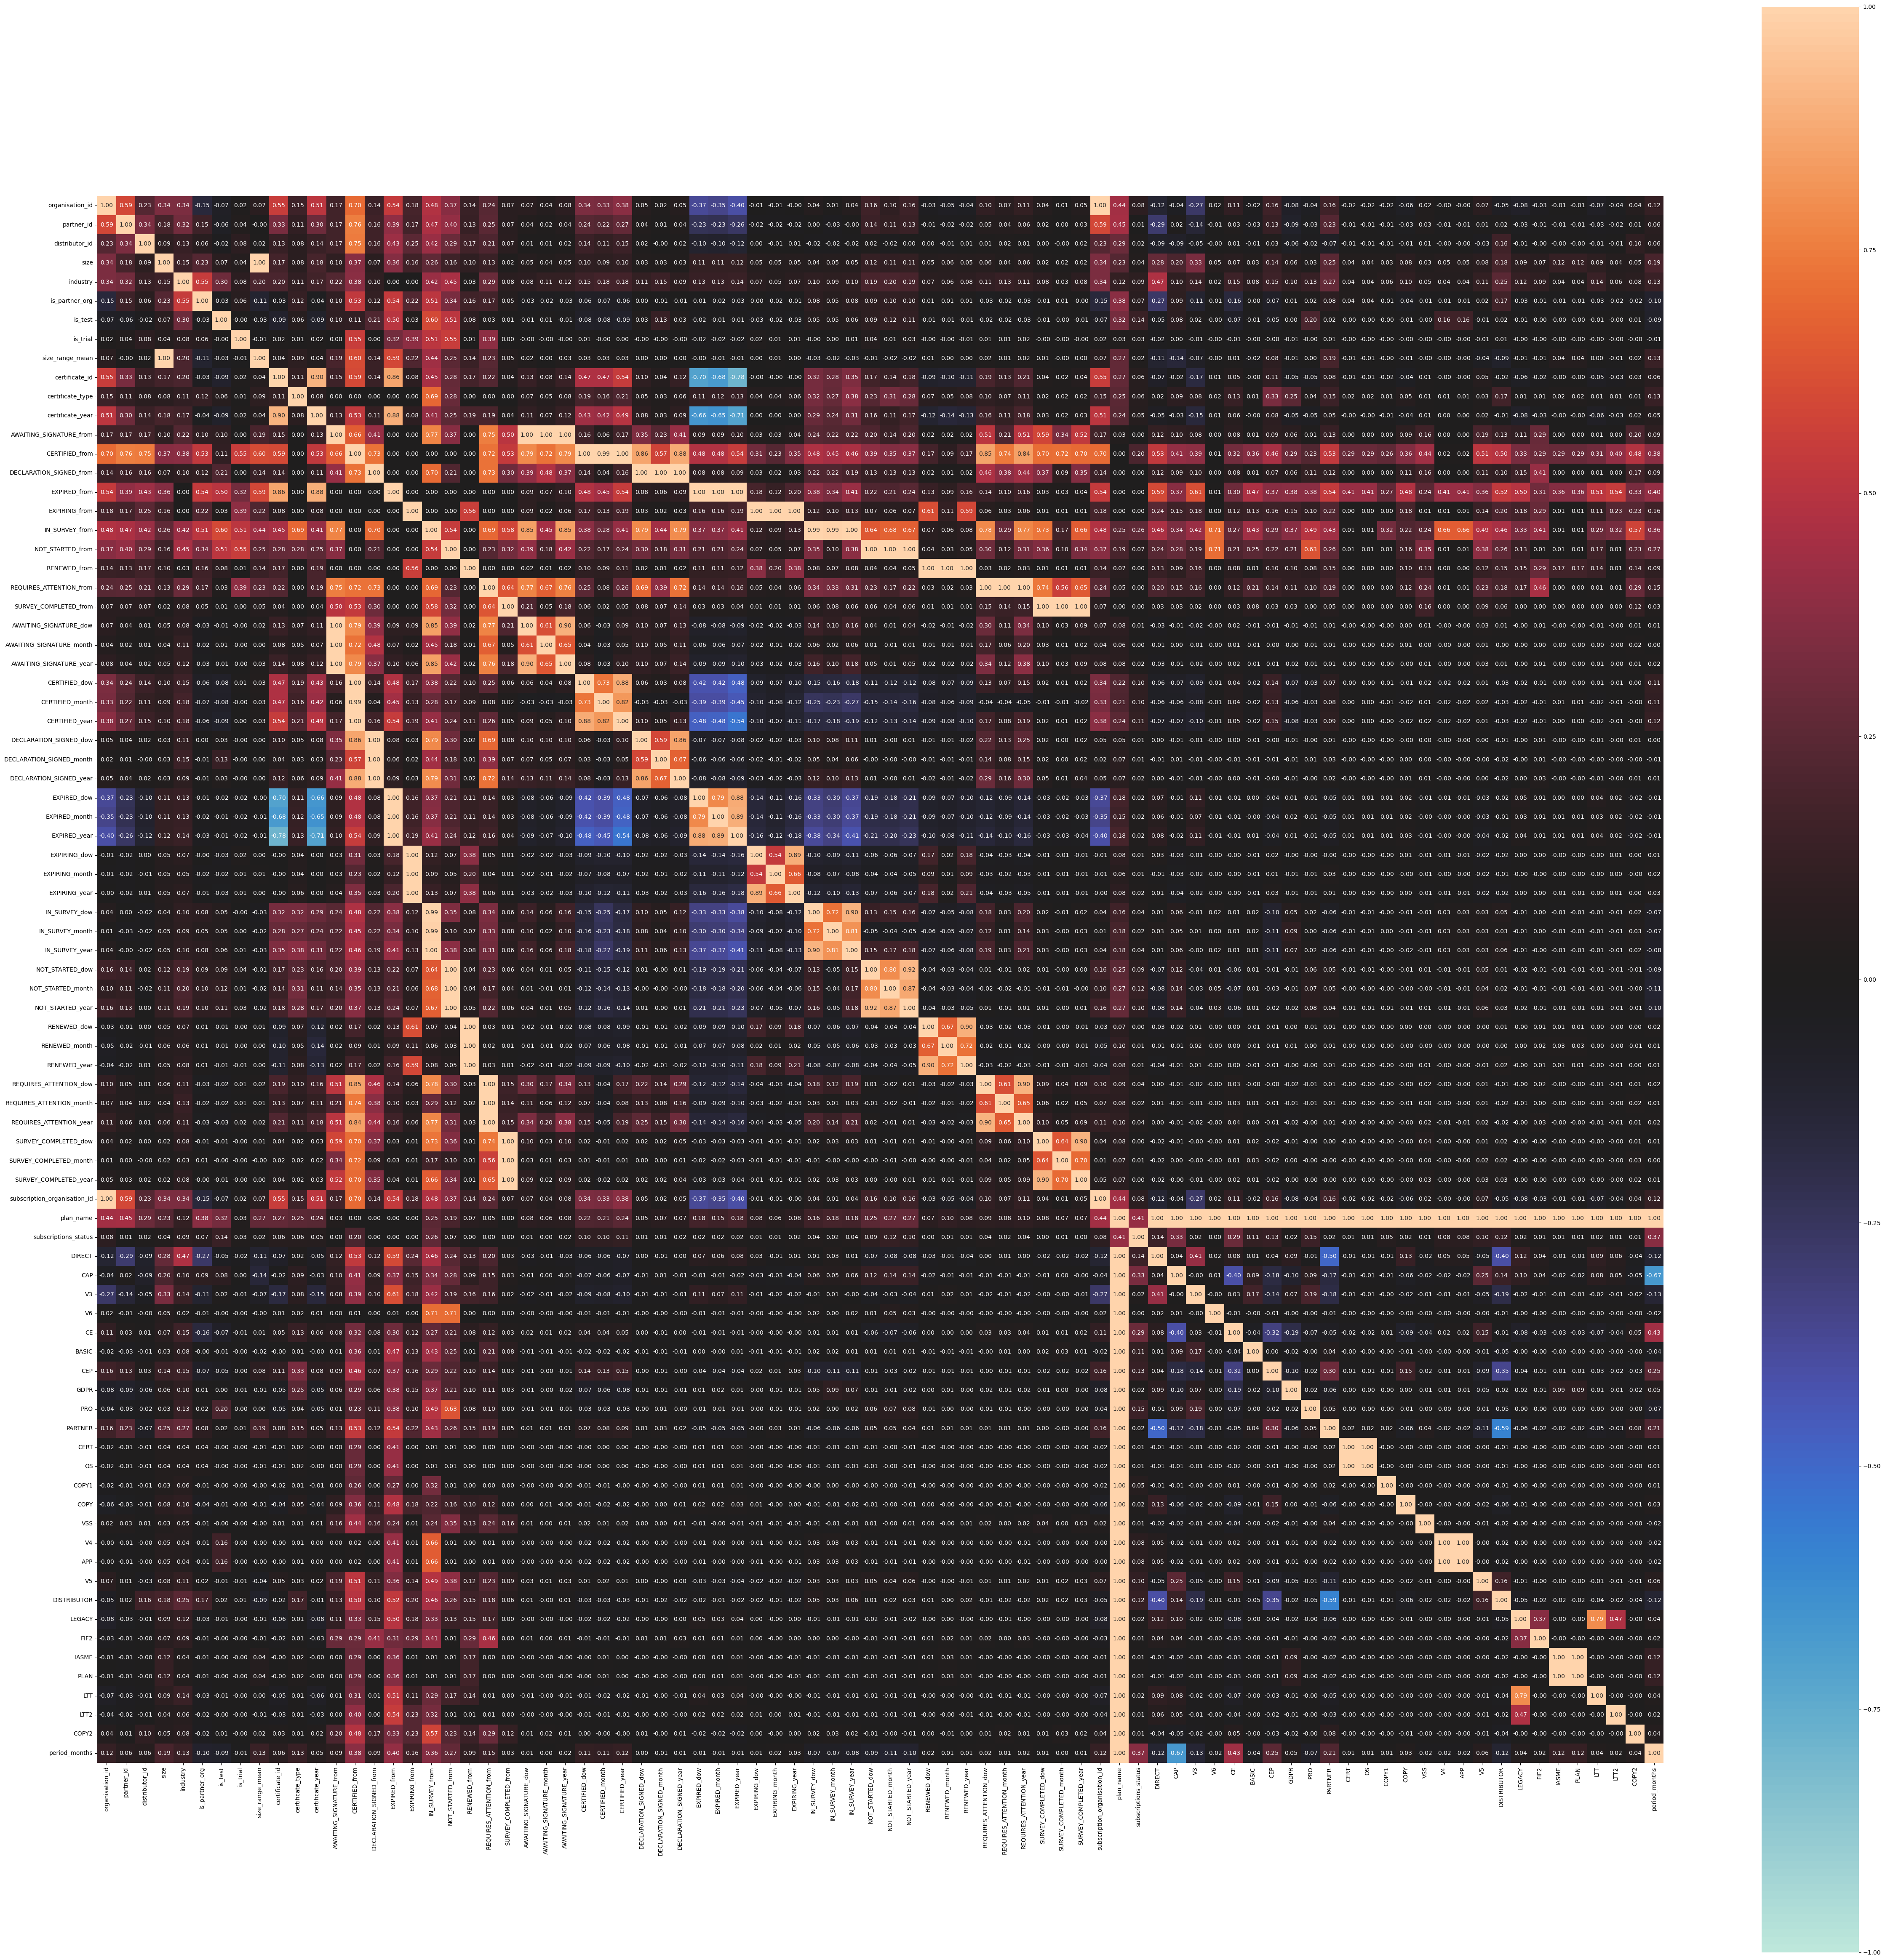

C:\Users\1\AppData\Local\Temp\ipykernel_26612\3236474176.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_corr=df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm',


In [34]:
#Correlation Matrix Of Complete Dataset
#the associations function in Python is used to find the correlation matrix between different types of feature variables and draw specific heat maps.
complete_correlation= associations(df_correlation, filename= 'complete_correlation.png', figsize=(60,60))
df_complete_corr=complete_correlation['corr']
df_complete_corr=complete_correlation['corr']
df_corr=df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm',
axis=None).set_precision(2)
df_corr

## Relationship between industry and is_partner_org

In [35]:
#df = df[['feater', 'predict']]

In [36]:
df_industry_partner_org=df[['industry','is_partner_org']]
df_industry_partner_org

industry  is_partner_org
0         MANU               0
1         ITEC               1
2         OTHE               0
3         OTHE               0
4         HEAL               0
...        ...             ...
17834     AOTH               0
17835     AOTH               0
17836     AOTH               0
17837     AOTH               0
17838     AOTH               0

[17839 rows x 2 columns]

In [37]:
A1_df_industry_partner_org= df_industry_partner_org[df_industry_partner_org["is_partner_org"] == 1] 
A1=A1_df_industry_partner_org.groupby(by="industry")['is_partner_org'].sum()
A1=pd.DataFrame(A1)

In [38]:
A0_df_industry_partner_org= df_industry_partner_org[df_industry_partner_org["is_partner_org"] == 0] 
A0=A0_df_industry_partner_org.groupby(by="industry")['is_partner_org'].sum()
A0=pd.DataFrame(A0)

In [39]:
df_A0_A1=pd.concat([A1,A0],axis=0)
df_A0_A1=df_A0_A1.reset_index()


[Text(0, 0, '92'),
 Text(0, 0, '186'),
 Text(0, 0, '500'),
 Text(0, 0, '1283'),
 Text(0, 0, '2062'),
 Text(0, 0, '4397'),
 Text(0, 0, '244')]

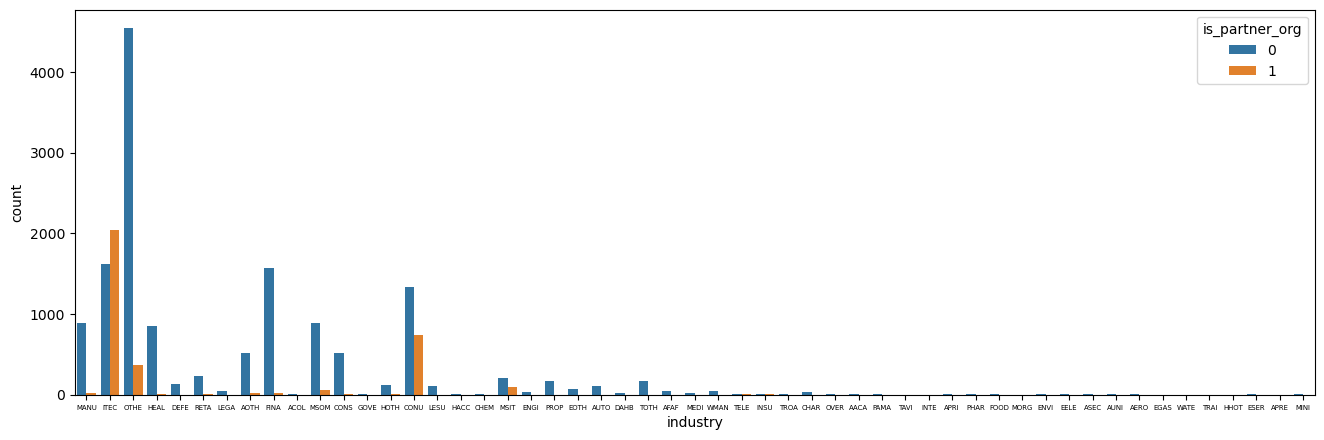

In [40]:

sns.countplot(x='industry',hue='is_partner_org',data=df_industry_partner_org)
plt.xticks(fontsize=5)
ax.bar_label(ax.containers[0])



These industries usually have partners: AACA,AOTH,APRI,CONS	,CONU ,DAHB,ENGI,EOTH,FINA,HEAL,HOTH,INSU,ITEC,MANU,MSIT ,MSOM ,OTHE ,OVER,RETA ,TAVI ,TELE		

## Relationship between certificate status name and is current_status

In [41]:
datapath_certifications="certifications.csv"
df_certifications_raw=pd.read_csv(datapath_certifications)
df_certifications_raw

CERTIFICATE_ID  ORGANISATION_ID CERTIFICATE_STATUS_NAME  \
0               43252            12069               IN SURVEY   
1               43793            28345               IN SURVEY   
2               43403            28156               IN SURVEY   
3               31135             2602               CERTIFIED   
4               43054             8896               IN SURVEY   
...               ...              ...                     ...   
16997           38129            26505      REQUIRES ATTENTION   
16998           42908            27993      REQUIRES ATTENTION   
16999           43283             2277               CERTIFIED   
17000           43076            27690               CERTIFIED   
17001           43523            19008               IN SURVEY   

       IS_CURRENT_STATUS        STATUS_VALID_FROM          STATUS_VALID_TO  \
0                   True  2023-01-30 14:37:40.048  2023-03-03 00:00:00.000   
1                   True  2023-03-02 10:59:51.990  2023-03-03 00:00:00.000   
2                   True  2023-02-03 09:35:53.698  2023-03-03 00:00:00.000   
3                   True  2023-03-02 09:27:18.983  2023-03-03 00:00:00.000   
4                   True  2023-02-27 12:56:51.554  2023-03-03 00:00:00.000   
...                  ...                      ...                      ...   
16997               True  2023-02-14 11:46:35.430  2023-03-03 00:00:00.000   
16998               True  2023-02-14 15:35:35.813  2023-03-03 00:00:00.000   
16999               True  2023-02-13 14:20:19.809  2023-03-03 00:00:00.000   
17000               True  2023-02-13 11:49:05.410  2023-03-03 00:00:00.000   
17001              False  2023-02-13 10:46:08.881  2023-02-14 15:59:18.617   

            CERTIFICATE_TYPE  CERTIFICATE_YEAR  
0           CYBER ESSENTIALS            2023.0  
1           CYBER ESSENTIALS            2023.0  
2           CYBER ESSENTIALS            2022.0  
3           CYBER ESSENTIALS            2022.0  
4           CYBER ESSENTIALS            2023.0  
...                      ...               ...  
16997       CYBER ESSENTIALS            2022.0  
16998       CYBER ESSENTIALS            2022.0  
16999       CYBER ESSENTIALS            2022.0  
17000  CYBER ESSENTIALS PLUS            2022.0  
17001       CYBER ESSENTIALS            2022.0  

[17002 rows x 8 columns]

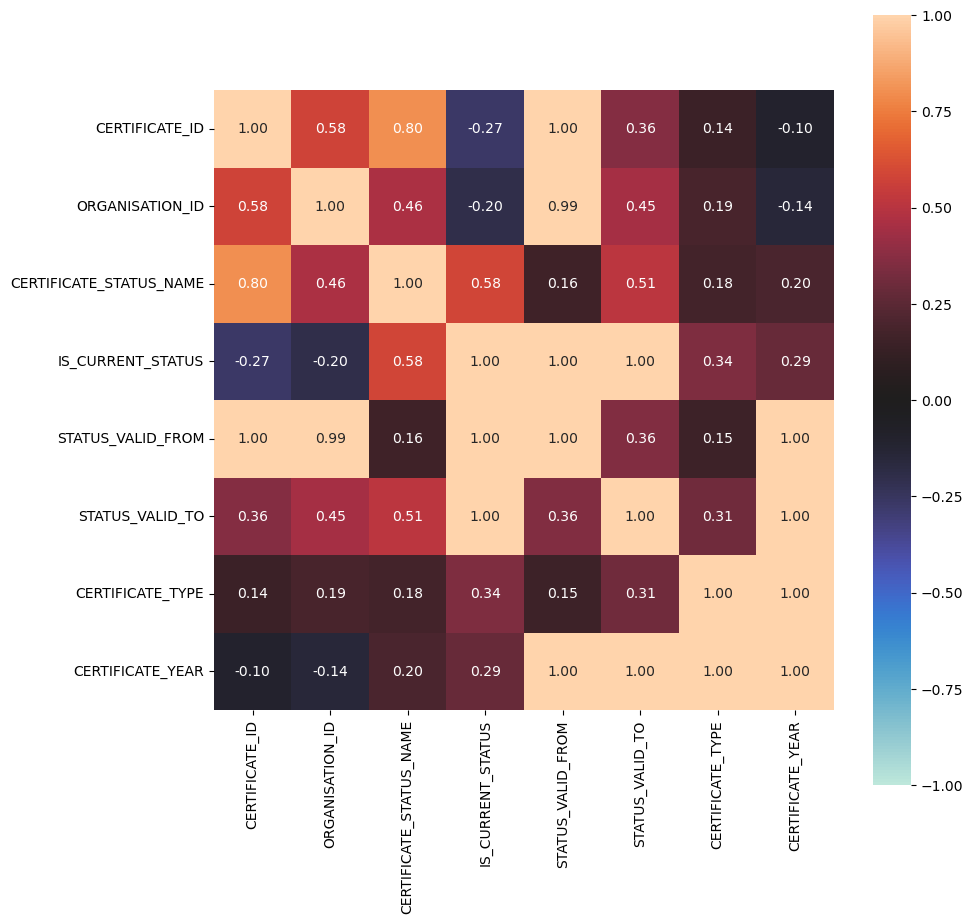

C:\Users\1\AppData\Local\Temp\ipykernel_26612\3693647001.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_corr=df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm',


In [42]:
complete_correlation= associations(df_certifications_raw, filename= 'complete_correlation.png', figsize=(10,10))
df_complete_corr=complete_correlation['corr']
df_complete_corr=complete_correlation['corr']
df_corr=df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm',
axis=None).set_precision(2)
df_corr

In [43]:
df_cer_status_name_cur_status=df_certifications_raw[['CERTIFICATE_STATUS_NAME','IS_CURRENT_STATUS']]


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'IN SURVEY'),
  Text(1, 0, 'CERTIFIED'),
  Text(2, 0, 'NOT STARTED'),
  Text(3, 0, 'REQUIRES ATTENTION'),
  Text(4, 0, 'DECLARATION SIGNED'),
  Text(5, 0, 'AWAITING SIGNATURE'),
  Text(6, 0, 'EXPIRED'),
  Text(7, 0, 'EXPIRING'),
  Text(8, 0, 'SURVEY COMPLETED'),
  Text(9, 0, 'RENEWED')])

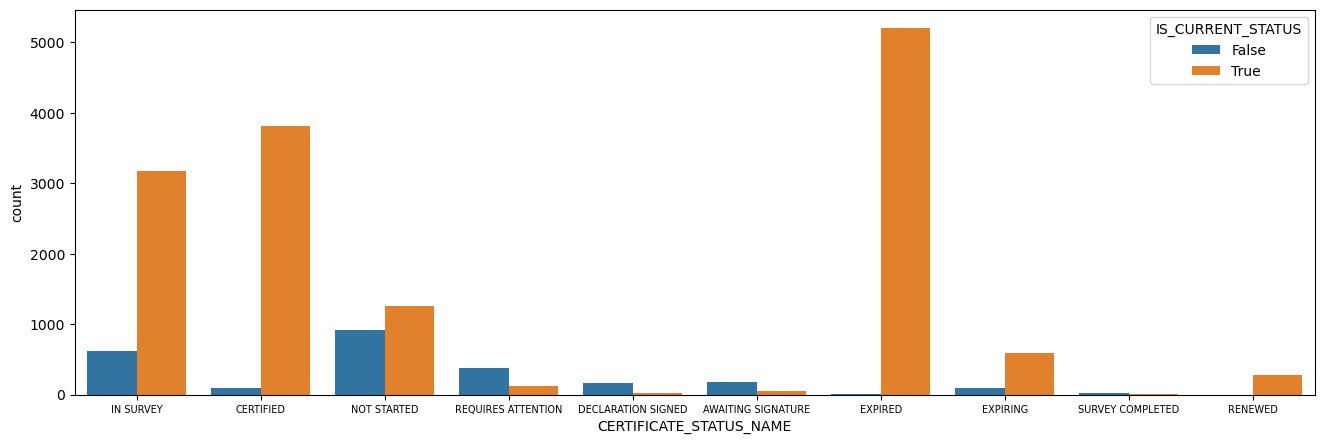

In [44]:
ax.bar_label(ax.containers[0])
sns.countplot(x='CERTIFICATE_STATUS_NAME',hue='IS_CURRENT_STATUS',data=df_cer_status_name_cur_status)
plt.xticks(fontsize=7)

